#(Optional) Advanced Tactics for Multicollinearity


## Lesson Objectives
By the end of this lesson, students will be able to:

Apply Variance Inflation Factor as a tool for identifying multicollinearity
Address multicollinearity by combining features
Avoid introducing multicollinearity when One-Hot-Encoding categorical variables. 

## Introduction
We previously discussed checking for and dealing with multicollinearity between our features. We used correlation to identify features that were highly correlated and dropped features to address the issue. 

There is another, more advanced approach to identifying multicollinearity the Variance Inflation Factor, which we will introduce in this lesson. We will also provide additional options for ways of fixing/removing multicollinearity.

## Variance Inflation Factor
Another way to determine multicollinearity is with variance inflation factors (VIF).  VIF is a number with a lower bound of 1 and no upper bound.  It represents the factor by which one variable is inflated by all others.

A VIF of 1 means that a feature varies exactly as much as we would expect if it were fully independent of all other features.

A VIF of 1.5 means that a feature varies 50% more than we would expect if it were fully independent of all other features.

If you want to know more about how VIF is calculated, this is a great resource

### How much VIF is too much VIF?
Generally, a feature with a VIF greater than 5 is considered to be too highly correlated with other features.  Such a feature will undermine our confidence in the interpretability of our model.  

### VIF in Python
We can use the statsmodels.stats package to calculate the VIF score for each feature.  To do this we will isolate only the independent features since we aren’t concerned at this point with correlations between features and the target.  

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# isolate independent variables
features = df.drop('MedPrice', axis=1)

NameError: name 'df' is not defined

Next, we will demean the features, or center them over 0.  We do this by subtracting the mean.  Luckily Pandas makes this exceptionally easy.

In [2]:
# demean the features
features = features - features.mean()

NameError: name 'features' is not defined

Finally, we will create a new dataframe to hold the VIF scores, with the feature names as the index.  We make a list of the VIF scores for each feature by looping through the features and applying the variance_inflation_factor() function to each one.  Finally, we will add the resulting list of VIF scores as a new column in the VIF dataframe.



Note that we are using list comprehension in the below code. This allows us to put a for loop inside a list constructor.  If you want to know more about how to use list comprehension in Python, you can check out this resource

In [3]:
# create a new dataframe to hold the VIF scores
VIF = pd.DataFrame(index=features.columns)
 
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
 
VIF['VIF'] = vif_scores
VIF

NameError: name 'pd' is not defined

Now let’s take a look at the result.  Remember we are looking for VIF scores above 5.  We can see the same problem features here as we did in the correlation matrix.  ‘AveRooms’, ‘AveBedrms’, ‘Latitude’, and ‘Longitude’ all have VIF scores over 5.  

How to Fix Multicollinearity
There are a few methods for dealing with multicollinearity, the easiest two are to drop columns or linearly combine columns.  Linearly combination means to combine features in such a way that if one feature changes it affects the combined feature in a linear way.

Dropping Columns
The easiest way to fix multicollinearity is to drop columns.  Let’s refer back to the correlation matrix to help us choose which columns to drop.
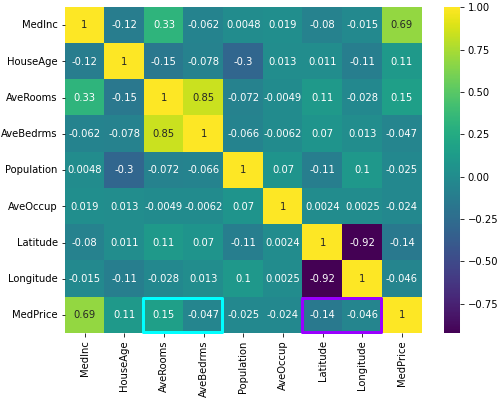

We don’t want to keep both ‘Latitude’ and ‘Longitude’ because of their collinearity.  But, which should we drop?  Let’s take a look at the strength of their correlation to our target, ‘MedPrice’.  We want to keep the features that are most strongly correlated to our target.  ‘Latitude’ has the stronger correlation at -0.14, so we will keep that and drop ‘Longitude’.

Looking at ‘AveRooms’ and ‘AveBedrms’ we can see that ‘AveRooms’ has a stronger correlation with ‘MedPrice’, so we will drop ‘AveBedrms’



NOTE:  Your business question may suggest more appropriate columns to keep.  If your stakeholders are particularly interested in how the average number of bedrooms in houses in a district or the longitude of a district affects the median price of that district, you would want to keep those columns and drop ‘AveRooms’ instead.


Let’s check the VIF scores again to see if our changes helped.

In [4]:
# drop columns with high VIF
df_no_multiColl = df.drop(['AveBedrms', 'Longitude'], axis=1)
 
# drop target
new_features = df_no_multiColl.drop('MedPrice', axis=1)
 
# demean features
new_features = new_features - new_features.mean()
 
# create VIF dataframe
new_VIF = pd.DataFrame(index=new_features.columns)
 
new_vif_scores = [variance_inflation_factor(new_features.values, i) for i in range(len(new_features.columns))]
 
new_VIF['VIF'] = new_vif_scores
 
new_VIF

NameError: name 'df' is not defined

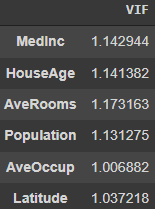
We can see that the VIF for ALL of the features has dropped to very low scores.  By dropping those two columns we have eliminated the multicollinearity in our dataset.



Linearly Combining Columns
Another strategy is to combine columns, however, this somewhat complicates model interpretation by changing the features.  We can no longer interpret the features we combine.  On the other hand, we may be able to create new features our stakeholders may find interesting.  Always communicate with stakeholders and subject matter experts before making decisions like these.

Let’s replace ‘AveBdrms’ and ‘AveRooms’ with the ratio of average bedrooms to average total rooms.  This is a completely different feature than the two we combined and no longer has information about the total size of houses, only the ratio of bedrooms and rooms.  Let’s also replace ‘Latitude’ and ‘Longitude’ with the sum of the two columns.  It’s not obvious what this new feature means in the real world and it may no longer be useful for interpretation.  However, we will see that it does have a strong correlation with ‘MedPrice’, so it will be useful for predictive power.

In [5]:
df_combine = df.copy()
 
# combine features
df_combine['BedRoomRatio'] = df_combine['AveBedrms'] / df_combine['AveRooms']
df_combine['LatPlusLong'] = df_combine['Latitude'] + df_combine['Longitude']
 
# drop original features
df_combine.drop(columns=['AveBedrms','AveRooms','Latitude','Longitude'], inplace=True)
df_combine.head()


NameError: name 'df' is not defined

Let’s check the new correlation matrix.



In [6]:
plt.figure(figsize=(8,6))
 
heatmap(df_combine.corr(), annot=True, cmap='viridis')

NameError: name 'plt' is not defined

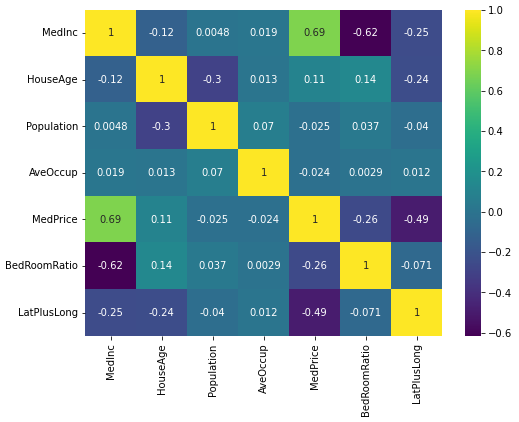

We no longer have any correlations over 0.8.  However, we’ve discovered something very interesting!  The average ratio of bedrooms to total rooms in a district is strongly negatively correlated with the median income of a district.  This may mean that wealthier districts have homes with more non-bedroom rooms!  This is a fascinating find.  Luckily the correlation is not above 0.8 so it should be okay.  We also see that our new sum of latitude and longitude is moderately to strongly correlated with ‘MedPrice’. It’s much more strongly correlated than either column was on its own.  It’s always worth experimenting with feature engineering.

Let’s check our VIF scores.



In [7]:
# drop target
combine_features = df_combine.drop('MedPrice', axis=1)
 
# demean features
combine_features = combine_features - combine_features.mean()
 
# create VIF dataframe
combine_VIF = pd.DataFrame(index=combine_features.columns)
 
combine_vif_scores = [variance_inflation_factor(combine_features.values, i) for i in range(len(combine_features.columns))]
combine_VIF['VIF'] = combine_vif_scores
 
combine_VIF

NameError: name 'df_combine' is not defined

Combining features has removed the multicollinearity from our feature set.  Combining features is another way to remove multicollinearity, but it can sometimes interfere with desired interpretations.

Multicollinearity and One-hot Encoding
Multicollinearity is introduced when one-hot encoding categorical variables. The resulting encoded features corresponding to the same original categorical features have perfect multicollinearity with each other because any one-hot encoded feature for a given categorical feature is 100% predictable by looking at the values of the others.  If all other columns for that feature are 0s, then the given column is a 1, otherwise, it is a 0.  To fix this problem we use dummy encoding.

The difference between dummy encoding and one-hot encoding is that with dummy encoding you drop one of the encoded columns for each original categorical feature.  

If we were one-hot encoding a fruit name feature:

In [8]:
# create a fruit dataframe
fruit = [['banana'],['orange'],['apple'],['apple'],['orange'],['banana']]
fruit = pd.DataFrame(fruit)
fruit

NameError: name 'pd' is not defined

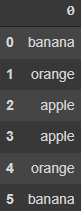

In [9]:
from sklearn.preprocessing import OneHotEncoder
 
# one-hot encode the fruit dataframe
ohe = OneHotEncoder(sparse=False)
onehot_fruit = ohe.fit_transform(fruit)
onehot_fruit = pd.DataFrame(onehot_fruit, columns=['apple','banana','orange'])
onehot_fruit

NameError: name 'pd' is not defined

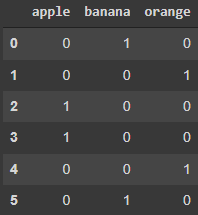

Let’s check the VIF scores for our new one-hot encoded fruit features.



In [10]:
# demean onehot_fruit
onehot_fruit = onehot_fruit - onehot_fruit.mean()
 
# create the VIF dataframe
fruit_VIF = pd.DataFrame(index=onehot_fruit.columns)
fruit_vif_scores = [variance_inflation_factor(onehot_fruit.values, i) for i in range(len(onehot_fruit.columns))]
fruit_VIF['VIF'] = fruit_vif_scores
 
fruit_VIF

NameError: name 'pd' is not defined

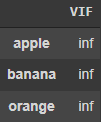

The scores are infinite because there is 100% multicollinearity between these features.  One feature can always be predicted by a combination of others.  

We can fix this by dropping one of the columns to remove the multicollinearity.  You could do this manually with df.drop(), or you can use the drop=’first’ argument in OneHotEncoder to do this automatically.

In [11]:
# dummy encode the fruit dataframe
ohe = OneHotEncoder(sparse=False, drop='first')
dummy_fruit = ohe.fit_transform(fruit)
dummy_fruit = pd.DataFrame(onehot_fruit, columns=['banana','orange'])
dummy_fruit

NameError: name 'pd' is not defined

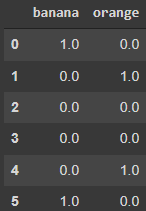

Now let’s check the VIF scores again.



In [12]:
# demean dummy_fruit
dummy_fruit = dummy_fruit - dummy_fruit.mean()
 
# create the VIF dataframe
fruit_VIF = pd.DataFrame(index=dummy_fruit.columns)
fruit_vif_scores = [variance_inflation_factor(dummy_fruit.values, i) for i in range(len(dummy_fruit.columns))]
fruit_VIF['VIF'] = fruit_vif_scores
 
fruit_VIF

NameError: name 'pd' is not defined

Dropping the ‘apple’ column removed the multicollinearity problem from these one-hot encoded features.

Here is a link to the notebook with the code for this lesson, in case you want to play around with the code.

Summary
If you want to be confident in your interpretation of a linear model, there are several assumptions that must be met.  One of these assumptions is that the features are not multicollinear.  Multicollinearity is when features are linearly correlated to each other, that is to say, they tend to change together in the data.  You can detect multicollinearity by examining the correlations between features in a correlation matrix, or by calculating the variance inflation factors for each feature.  Two ways to deal with multicollinearity are removing features and combining features.  One-hot encoded features always contain multicollinearity if all resulting columns are kept in the feature set. This can be avoided by dropping one of the one-hot encoded columns that correspond to each categorical feature.  This is called dummy encoding